In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
import urllib
import requests
import os
import io
import json
import pylab as pl
import shapely
from fiona.crs import from_epsg
import glob

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
os.getenv("PUIDATA")

'/nfshome/yf1150/PUIdata'

## getting the census shapefile

In [13]:
# cannot directly curl because not static url page, request method will work because... 
url = "https://data.cityofnewyork.us/api/geospatial/fxpq-c8ku?method=export&format=Shapefile"
urllib.request.urlretrieve(url, "file.gz")
!unzip -d $PUIDATA file.gz

Archive:  file.gz
  inflating: /nfshome/yf1150/PUIdata/geo_export_f281aa0f-9c2e-4ab6-bfd0-2138aa35da8c.dbf  
  inflating: /nfshome/yf1150/PUIdata/geo_export_f281aa0f-9c2e-4ab6-bfd0-2138aa35da8c.shp  
  inflating: /nfshome/yf1150/PUIdata/geo_export_f281aa0f-9c2e-4ab6-bfd0-2138aa35da8c.shx  
  inflating: /nfshome/yf1150/PUIdata/geo_export_f281aa0f-9c2e-4ab6-bfd0-2138aa35da8c.prj  


In [14]:
ct = gpd.GeoDataFrame.from_file(os.getenv("PUIDATA") + "/" + 
                                     "geo_export_f281aa0f-9c2e-4ab6-bfd0-2138aa35da8c.shp")

In [15]:
ct.head()

,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry
0,5,5000900,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016794,POLYGON ((-74.07920577013245 40.64343078374567...
1,1,1009800,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.199811,POLYGON ((-73.96432543478758 40.75638153099091...
2,1,1010000,Manhattan,I,010000,100,MN19,Turtle Bay-East Midtown,3808,1.860938e+06,5692.168737,POLYGON ((-73.96802436915851 40.75957814005282...
3,1,1010200,Manhattan,I,010200,102,MN17,Midtown-Midtown South,3807,1.860993e+06,5687.802439,POLYGON ((-73.97124277307127 40.76093641847906...
4,1,1010400,Manhattan,I,010400,104,MN17,Midtown-Midtown South,3807,1.864600e+06,5693.036367,POLYGON ((-73.97445730550224 40.76229308352487...


In [16]:
man = ct[ct["boro_name"] == "Manhattan"]

In [2]:
ax = man.plot()
man.plot(edgecolor = "r", ax = ax, alpha=0.5)
#set the axis differently
ax.axes.set_aspect('equal','datalim')

NameError: name 'man' is not defined

In [18]:
man.crs

{'init': 'epsg:4326'}

In [20]:
man_2263 = man.to_crs(epsg=2263)

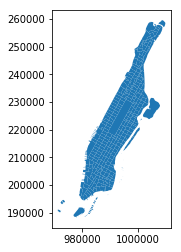

In [21]:
man_2263.plot()
# you get a different projection

## Get some Citi Bike data

In [ ]:
datastring01 = 
getCitiBikeCSV(datastring01)

In [3]:
ct201501 = pd.read_csv('201501-citibike-tripdata.csv')

In [4]:
ct201501.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [7]:
# only get the 1000 data
cb = ct201501[::1000]

In [8]:
cb.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1000,581,1/1/2015 10:46,1/1/2015 10:56,466,W 25 St & 6 Ave,40.743954,-73.991449,375,Mercer St & Bleecker St,40.726795,-73.996951,15552,Subscriber,1984.0,1
2000,727,1/1/2015 13:39,1/1/2015 13:51,312,Allen St & E Houston St,40.722055,-73.989111,428,E 3 St & 1 Ave,40.724677,-73.987834,20781,Subscriber,1964.0,1
3000,490,1/1/2015 15:48,1/1/2015 15:56,483,E 12 St & 3 Ave,40.732233,-73.988900,482,W 15 St & 7 Ave,40.739355,-73.999318,17606,Subscriber,1990.0,1
4000,182,1/1/2015 17:51,1/1/2015 17:54,297,E 15 St & 3 Ave,40.734232,-73.986923,2003,1 Ave & E 18 St,40.734161,-73.980243,18978,Subscriber,1967.0,1


In [9]:
# extract a column from a data frame, nested []
cb[['start station longitude', 'start station latitude']]

,start station longitude,start station latitude
0,-73.969053,40.750020
1000,-73.991449,40.743954
2000,-73.989111,40.722055
3000,-73.988900,40.732233
4000,-73.986923,40.734232
5000,-74.000271,40.735238
6000,-73.981632,40.752062
7000,-73.987882,40.762272
8000,-74.008592,40.736197
9000,-73.983209,40.741473


In [22]:
a = [1,2,3]
b = ['a','b','c']

In [23]:
zip(a,b)

In [24]:
# in python 3, need to list to see what is in zip
list(zip(a,b))

[(1, 'a'), (2, 'b'), (3, 'c')]

In [10]:
list(zip(cb['start station longitude'].values, cb['start station latitude']))

[(-73.969053009999996, 40.750019860000002),
 (-73.99144871, 40.743954109999997),
 (-73.989110999999994, 40.722054999999997),
 (-73.988899570000001, 40.732232719999999),
 (-73.986923000000004, 40.734231999999999),
 (-74.000270999999998, 40.735238000000003),
 (-73.981632399999995, 40.752062309999999),
 (-73.987882049999996, 40.76227205),
 (-74.008592070000006, 40.736196700000001),
 (-73.983209279999997, 40.741472860000002),
 (-74.00166999999999, 40.707872999999999),
 (-73.994618430000003, 40.760094369999997),
 (-73.990538999999998, 40.693829999999998),
 (-73.987535230000006, 40.751726320000003),
 (-74.002970880000007, 40.72710258),
 (-73.989978249999993, 40.720195760000003),
 (-73.985179770000002, 40.720664419999999),
 (-74.005664429999996, 40.722437970000001),
 (-73.967416, 40.756014),
 (-74.002950350000006, 40.749717750000002),
 (-73.977987400000004, 40.753201590000003),
 (-74.003664430000001, 40.743174490000001),
 (-74.004830909999995, 40.735353979999999),
 (-73.983624640000002, 40.69

In [11]:
# combine lat and lon to one column
cb['lonlat'] = list(zip(cb['start station longitude'].values, cb['start station latitude'].values))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [12]:
# make lonlat into actual point data
# Create Point Geometry for based on lonlat column
cb['geometry'] = cb[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


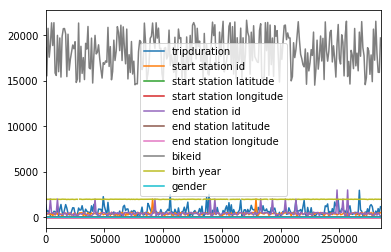

In [13]:
cb.plot()

In [14]:
cb = gpd.GeoDataFrame(cb)

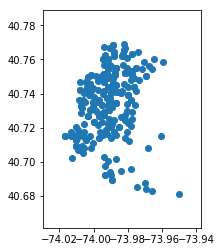

In [15]:
cb.plot()

In [16]:
# has no crs
cb.crs

In [17]:
# 4326 is the right coordinate
cb.crs = from_epsg(4326)

In [18]:
# now it has crs
cb.crs

{'init': 'epsg:4326', 'no_defs': True}

In [23]:
# to the coordinate system
cb = cb.to_crs(epsg = 2263)

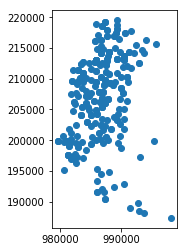

In [24]:
cb.plot()

## spatial weight

In [21]:
import pysal as ps

In [22]:
w = ps.weights.Queen.from_dataframe(ct)

AttributeError: module 'pysal.weights' has no attribute 'Queen'

In [ ]:
pl.imshow(w.full()[0])